## Name: Souri Rishik Volety
## Reg No: 230968004

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist, cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
import seaborn as sns

2025-08-14 09:13:13.204041: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-14 09:13:13.232734: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-08-14 09:13:13.650645: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
(x_train_fmnist, y_train_fmnist), (x_test_fmnist, y_test_fmnist) = fashion_mnist.load_data()

In [3]:
num_classes_fmnist = len(np.unique(y_train_fmnist))
print(f"Number of classes in Fashion MNIST: {num_classes_fmnist}")

Number of classes in Fashion MNIST: 10


In [4]:
print(f"Image shape: {x_train_fmnist[0].shape}")

Image shape: (28, 28)


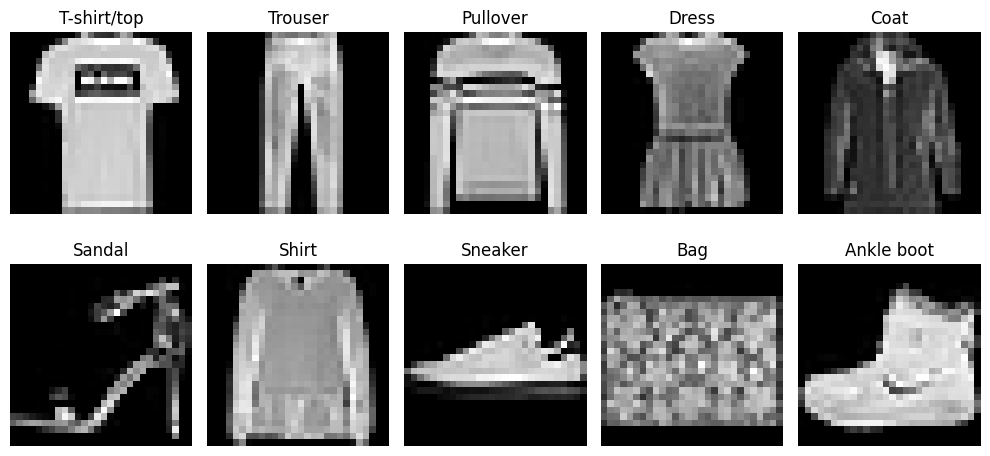

In [5]:
class_names_fmnist = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                      'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,5))
for i in range(num_classes_fmnist):
    idx = np.where(y_train_fmnist == i)[0][0]
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train_fmnist[idx], cmap='gray')
    plt.title(class_names_fmnist[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [6]:
x_train_fmnist = x_train_fmnist / 255.0
x_test_fmnist = x_test_fmnist / 255.0

x_train_fmnist_cnn = x_train_fmnist.reshape(-1, 28, 28, 1)
x_test_fmnist_cnn = x_test_fmnist.reshape(-1, 28, 28, 1)

y_train_fmnist_cat = to_categorical(y_train_fmnist)
y_test_fmnist_cat = to_categorical(y_test_fmnist)

In [7]:
fcnn_fmnist = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

fcnn_fmnist.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

history_fcnn_fmnist = fcnn_fmnist.fit(x_train_fmnist, y_train_fmnist_cat,
                                      epochs=50, validation_split=0.2, batch_size=64)

2025-08-14 09:13:15.060978: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-08-14 09:13:15.077049: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-08-14 09:13:15.077191: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

Epoch 1/50


2025-08-14 09:13:16.697122: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2025-08-14 09:13:16.698561: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fbd872d6020 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-08-14 09:13:16.698574: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2025-08-14 09:13:16.701719: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-08-14 09:13:16.797791: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2025-08-14 09:13:16.870026: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the p

750/750 [==============================] - 4s 4ms/step - loss: 0.5185 - accuracy: 0.8137 - val_loss: 0.4029 - val_accuracy: 0.8547
Epoch 2/50
750/750 [==============================] - 3s 4ms/step - loss: 0.3738 - accuracy: 0.8649 - val_loss: 0.3573 - val_accuracy: 0.8687
Epoch 3/50
750/750 [==============================] - 3s 4ms/step - loss: 0.3362 - accuracy: 0.8756 - val_loss: 0.3543 - val_accuracy: 0.8742
Epoch 4/50
750/750 [==============================] - 3s 4ms/step - loss: 0.3144 - accuracy: 0.8840 - val_loss: 0.3272 - val_accuracy: 0.8809
Epoch 5/50
750/750 [==============================] - 3s 4ms/step - loss: 0.2916 - accuracy: 0.8923 - val_loss: 0.3175 - val_accuracy: 0.8866
Epoch 6/50
750/750 [==============================] - 3s 4ms/step - loss: 0.2781 - accuracy: 0.8961 - val_loss: 0.3306 - val_accuracy: 0.8800
Epoch 7/50
750/750 [==============================] - 3s 4ms/step - loss: 0.2644 - accuracy: 0.9013 - val_loss: 0.3398 - val_accuracy: 0.8797
Epoch 8/50
750/75

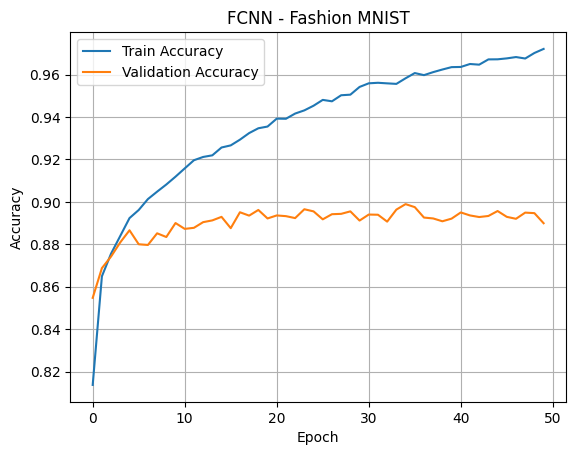

In [8]:
plt.plot(history_fcnn_fmnist.history['accuracy'], label='Train Accuracy')
plt.plot(history_fcnn_fmnist.history['val_accuracy'], label='Validation Accuracy')
plt.title('FCNN - Fashion MNIST')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
cnn1_fmnist = Sequential([
    Conv2D(32, (5, 5), strides=1, padding='valid', activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])

cnn1_fmnist.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_cnn1_fmnist = cnn1_fmnist.fit(x_train_fmnist_cnn, y_train_fmnist_cat,
                                      epochs=30, validation_split=0.2, batch_size=64)

Epoch 1/30
750/750 [==============================] - 4s 4ms/step - loss: 0.4618 - accuracy: 0.8375 - val_loss: 0.3552 - val_accuracy: 0.8736
Epoch 2/30
750/750 [==============================] - 3s 5ms/step - loss: 0.3168 - accuracy: 0.8872 - val_loss: 0.3167 - val_accuracy: 0.8889
Epoch 3/30
750/750 [==============================] - 3s 5ms/step - loss: 0.2710 - accuracy: 0.9021 - val_loss: 0.2944 - val_accuracy: 0.8947
Epoch 4/30
750/750 [==============================] - 3s 5ms/step - loss: 0.2385 - accuracy: 0.9134 - val_loss: 0.2773 - val_accuracy: 0.9020
Epoch 5/30
750/750 [==============================] - 3s 5ms/step - loss: 0.2159 - accuracy: 0.9207 - val_loss: 0.2661 - val_accuracy: 0.9039
Epoch 6/30
750/750 [==============================] - 3s 4ms/step - loss: 0.1933 - accuracy: 0.9279 - val_loss: 0.2549 - val_accuracy: 0.9099
Epoch 7/30
750/750 [==============================] - 4s 5ms/step - loss: 0.1732 - accuracy: 0.9352 - val_loss: 0.2674 - val_accuracy: 0.9072
Epoch 

In [10]:
cnn2_fmnist = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])

cnn2_fmnist.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_cnn2_fmnist = cnn2_fmnist.fit(x_train_fmnist_cnn, y_train_fmnist_cat,
                                      epochs=30, validation_split=0.2, batch_size=64)


Epoch 1/30
750/750 [==============================] - 5s 5ms/step - loss: 0.4379 - accuracy: 0.8455 - val_loss: 0.3230 - val_accuracy: 0.8817
Epoch 2/30
750/750 [==============================] - 3s 5ms/step - loss: 0.2755 - accuracy: 0.9011 - val_loss: 0.2709 - val_accuracy: 0.9009
Epoch 3/30
750/750 [==============================] - 4s 5ms/step - loss: 0.2279 - accuracy: 0.9175 - val_loss: 0.2372 - val_accuracy: 0.9132
Epoch 4/30
750/750 [==============================] - 4s 5ms/step - loss: 0.1914 - accuracy: 0.9294 - val_loss: 0.2444 - val_accuracy: 0.9112
Epoch 5/30
750/750 [==============================] - 4s 5ms/step - loss: 0.1619 - accuracy: 0.9395 - val_loss: 0.2526 - val_accuracy: 0.9084
Epoch 6/30
750/750 [==============================] - 4s 5ms/step - loss: 0.1363 - accuracy: 0.9499 - val_loss: 0.2436 - val_accuracy: 0.9175
Epoch 7/30
750/750 [==============================] - 4s 5ms/step - loss: 0.1132 - accuracy: 0.9599 - val_loss: 0.2514 - val_accuracy: 0.9185
Epoch 

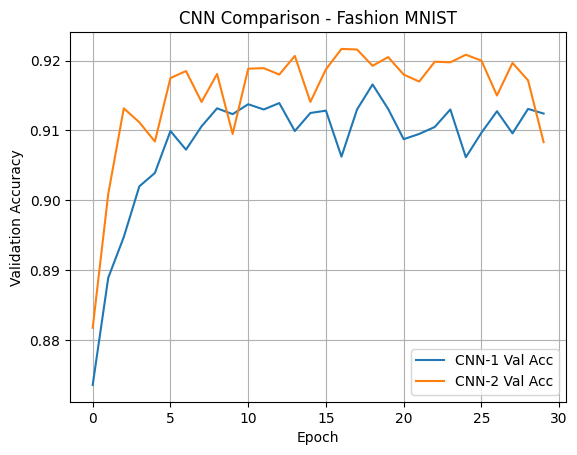

In [30]:
plt.plot(history_cnn1_fmnist.history['val_accuracy'], label='CNN-1 Val Acc')
plt.plot(history_cnn2_fmnist.history['val_accuracy'], label='CNN-2 Val Acc')
plt.title('CNN Comparison - Fashion MNIST')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
(x_train_cifar, y_train_cifar), (x_test_cifar, y_test_cifar) = cifar10.load_data()

In [13]:
print(f"Number of classes in CIFAR-10: {len(np.unique(y_train_cifar))}")

Number of classes in CIFAR-10: 10


In [14]:
print(f"Image shape: {x_train_cifar[0].shape}")

Image shape: (32, 32, 3)


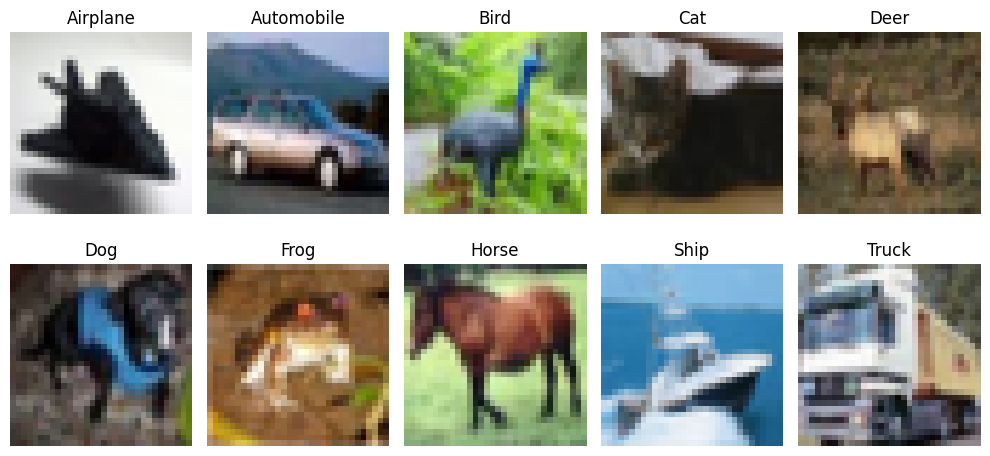

In [15]:
class_names_cifar = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
                     'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

plt.figure(figsize=(10,5))
for i in range(10):
    idx = np.where(y_train_cifar == i)[0][0]
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train_cifar[idx])
    plt.title(class_names_cifar[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [16]:
x_train_cifar = x_train_cifar / 255.0
x_test_cifar = x_test_cifar / 255.0

y_train_cifar_cat = to_categorical(y_train_cifar)
y_test_cifar_cat = to_categorical(y_test_cifar)

In [25]:
fcnn_cifar = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

fcnn_cifar.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

history_fcnn_cifar = fcnn_cifar.fit(x_train_cifar, y_train_cifar_cat,
                                    epochs=75, validation_split=0.2, batch_size=64)

Epoch 1/75
625/625 [==============================] - 4s 5ms/step - loss: 1.8874 - accuracy: 0.3158 - val_loss: 1.7409 - val_accuracy: 0.3766
Epoch 2/75
625/625 [==============================] - 3s 5ms/step - loss: 1.6990 - accuracy: 0.3882 - val_loss: 1.7270 - val_accuracy: 0.3768
Epoch 3/75
625/625 [==============================] - 3s 5ms/step - loss: 1.6205 - accuracy: 0.4201 - val_loss: 1.6195 - val_accuracy: 0.4224
Epoch 4/75
625/625 [==============================] - 3s 5ms/step - loss: 1.5556 - accuracy: 0.4430 - val_loss: 1.5971 - val_accuracy: 0.4281
Epoch 5/75
625/625 [==============================] - 3s 5ms/step - loss: 1.5152 - accuracy: 0.4598 - val_loss: 1.5479 - val_accuracy: 0.4555
Epoch 6/75
625/625 [==============================] - 3s 5ms/step - loss: 1.4734 - accuracy: 0.4705 - val_loss: 1.5828 - val_accuracy: 0.4364
Epoch 7/75
625/625 [==============================] - 3s 5ms/step - loss: 1.4398 - accuracy: 0.4841 - val_loss: 1.5090 - val_accuracy: 0.4638
Epoch 

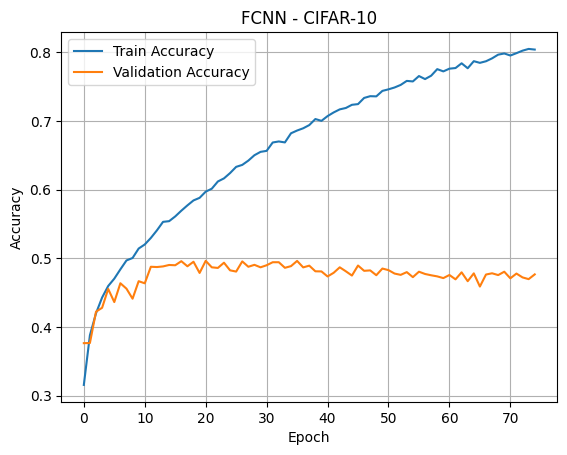

In [26]:
plt.plot(history_fcnn_cifar.history['accuracy'], label='Train Accuracy')
plt.plot(history_fcnn_cifar.history['val_accuracy'], label='Validation Accuracy')
plt.title('FCNN - CIFAR-10')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [27]:
cnn1_cifar = Sequential([
    Conv2D(32, (5, 5), strides=1, padding='valid', activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])

cnn1_cifar.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_cnn1_cifar = cnn1_cifar.fit(x_train_cifar, y_train_cifar_cat,
                                    epochs=30, validation_split=0.2, batch_size=64)

Epoch 1/30
625/625 [==============================] - 4s 5ms/step - loss: 1.5732 - accuracy: 0.4381 - val_loss: 1.3373 - val_accuracy: 0.5243
Epoch 2/30
625/625 [==============================] - 3s 5ms/step - loss: 1.2454 - accuracy: 0.5610 - val_loss: 1.2591 - val_accuracy: 0.5572
Epoch 3/30
625/625 [==============================] - 3s 5ms/step - loss: 1.1238 - accuracy: 0.6052 - val_loss: 1.1425 - val_accuracy: 0.6005
Epoch 4/30
625/625 [==============================] - 3s 5ms/step - loss: 1.0229 - accuracy: 0.6426 - val_loss: 1.1450 - val_accuracy: 0.5997
Epoch 5/30
625/625 [==============================] - 3s 5ms/step - loss: 0.9586 - accuracy: 0.6683 - val_loss: 1.0708 - val_accuracy: 0.6325
Epoch 6/30
625/625 [==============================] - 3s 5ms/step - loss: 0.8825 - accuracy: 0.6949 - val_loss: 1.0521 - val_accuracy: 0.6446
Epoch 7/30
625/625 [==============================] - 3s 5ms/step - loss: 0.8298 - accuracy: 0.7117 - val_loss: 1.0655 - val_accuracy: 0.6430
Epoch 

In [28]:
cnn2_cifar = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])

cnn2_cifar.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_cnn2_cifar = cnn2_cifar.fit(x_train_cifar, y_train_cifar_cat,
                                    epochs=30, validation_split=0.2, batch_size=64)

Epoch 1/30
625/625 [==============================] - 4s 6ms/step - loss: 1.5023 - accuracy: 0.4577 - val_loss: 1.2393 - val_accuracy: 0.5682
Epoch 2/30
625/625 [==============================] - 4s 6ms/step - loss: 1.1314 - accuracy: 0.6026 - val_loss: 1.0972 - val_accuracy: 0.6140
Epoch 3/30
625/625 [==============================] - 3s 5ms/step - loss: 0.9799 - accuracy: 0.6571 - val_loss: 1.0421 - val_accuracy: 0.6368
Epoch 4/30
625/625 [==============================] - 3s 5ms/step - loss: 0.8810 - accuracy: 0.6906 - val_loss: 1.0006 - val_accuracy: 0.6551
Epoch 5/30
625/625 [==============================] - 4s 6ms/step - loss: 0.8002 - accuracy: 0.7224 - val_loss: 1.0081 - val_accuracy: 0.6599
Epoch 6/30
625/625 [==============================] - 3s 6ms/step - loss: 0.7278 - accuracy: 0.7458 - val_loss: 0.9987 - val_accuracy: 0.6639
Epoch 7/30
625/625 [==============================] - 4s 6ms/step - loss: 0.6535 - accuracy: 0.7716 - val_loss: 1.0156 - val_accuracy: 0.6618
Epoch 

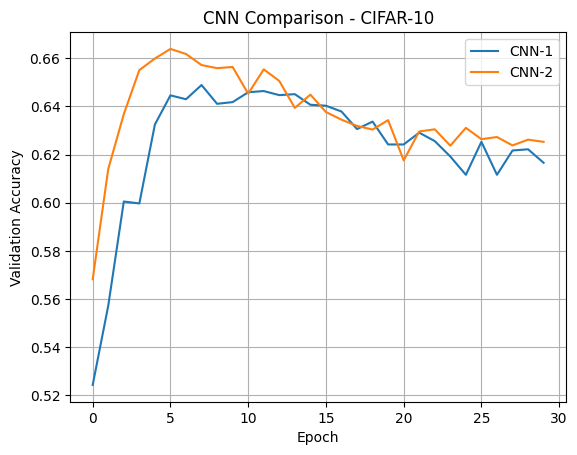

In [31]:
plt.plot(history_cnn1_cifar.history['val_accuracy'], label='CNN-1')
plt.plot(history_cnn2_cifar.history['val_accuracy'], label='CNN-2')
plt.title('CNN Comparison - CIFAR-10')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()